### Homework 2b

Instructions:

For each of the problems below, Add the following things:
- Code to solve the problem
- Proof of acceptance/attempt (screenshot/link)
- Time Complexity
- Space Complexity
- Thought Process / Reflection on Challenges Faced
- Time Taken for that problem (leetcode provides builtin timer functionality)

**Problem 0:**
Teemo Attacking (Ungraded, Warm-up)

In [ ]:
class Solution:
    def findPoisonedDuration(self, timeSeries: List[int], duration: int) -> int:
        
        intervals = []
        totalDuration = 0

        currentInterval = [timeSeries[0], timeSeries[0] + duration - 1]

        for i in range(len(timeSeries)):
            
            if currentInterval[-1] < timeSeries[i]:
                intervals.append(currentInterval)
                currentInterval = [timeSeries[i], timeSeries[i] + duration - 1]
            else:
                currentInterval[-1] = timeSeries[i] + duration - 1

            if i == len(timeSeries) - 1 and currentInterval not in intervals:
                intervals.append(currentInterval)
            
        for interval in intervals:
            totalDuration += interval[-1] - interval[0] + 1

        return totalDuration

Proof of Acceptance / Attempt:

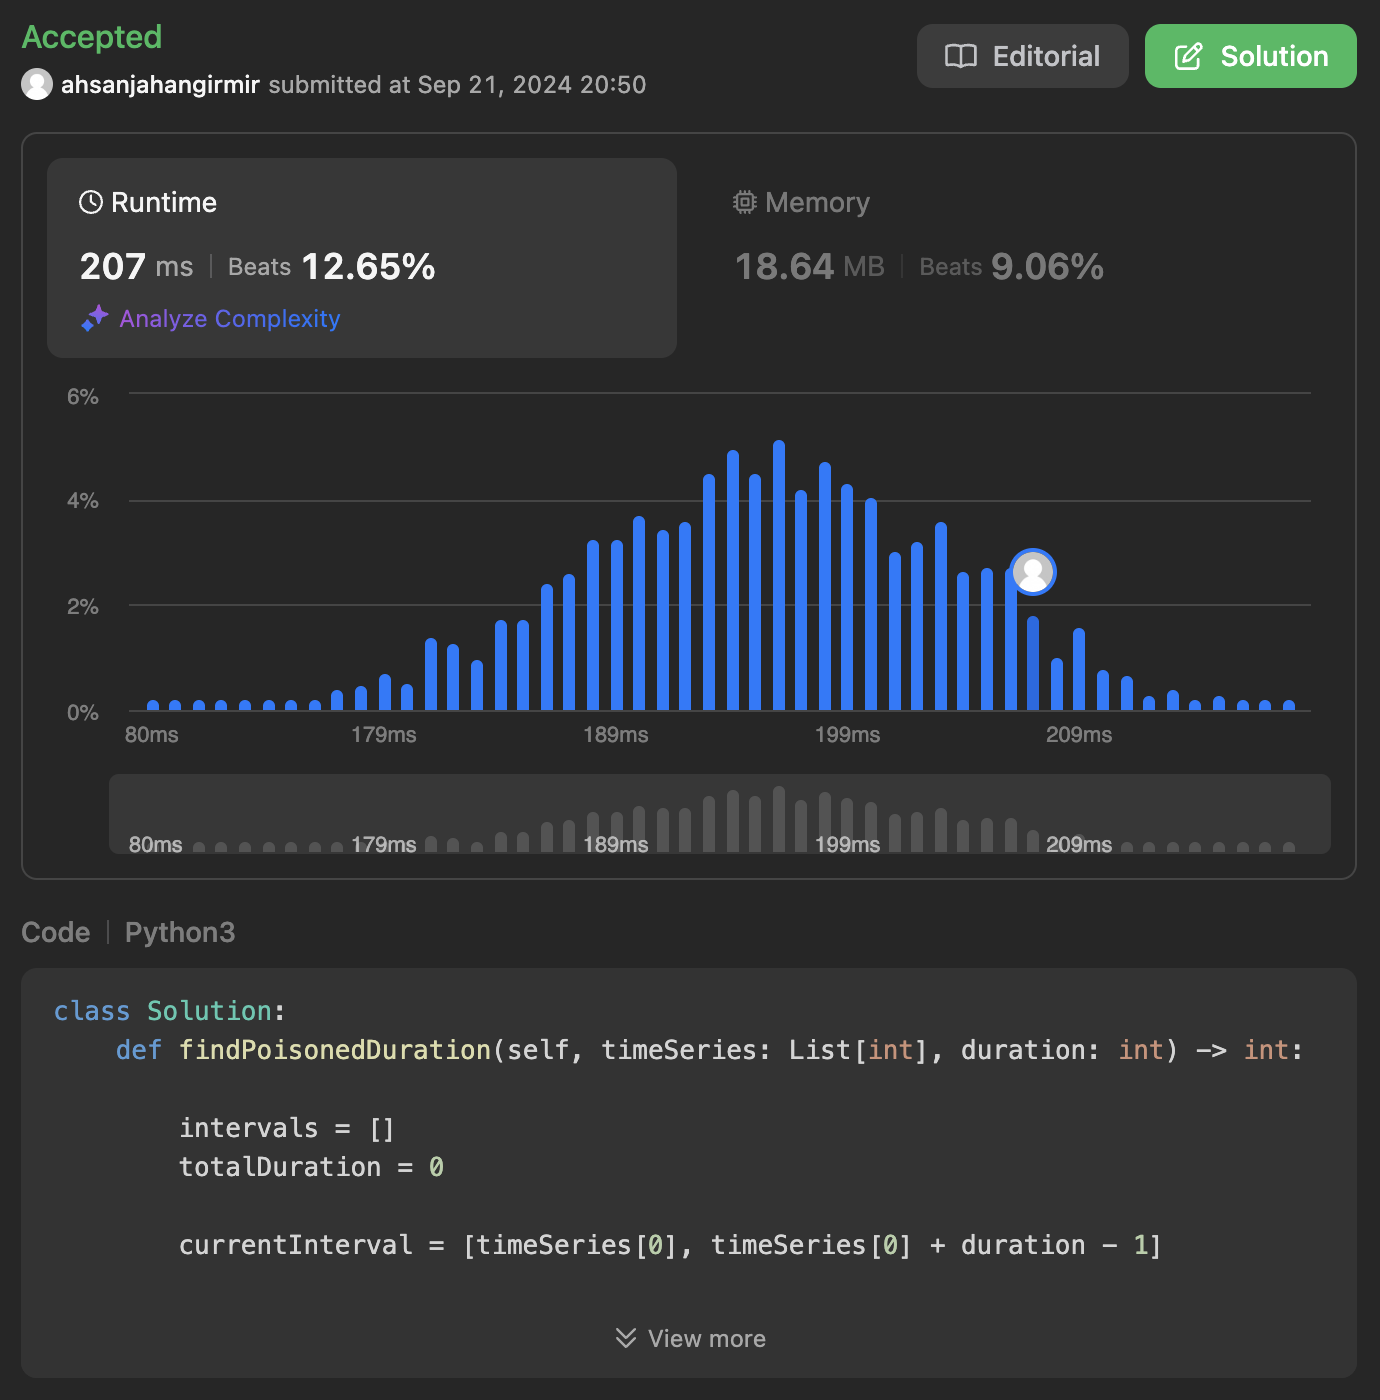

Thought Process / Reflection on challenges faced:

No challenges faced here.

Time Complexity

O(N)

Space Complexity

O(1)

Time Taken

16 Minutes

**Problem 1:**
Insert Interval

In [ ]:
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
        
        insertIndex = 0

        for interval in intervals:
            
            if interval[0] > newInterval[0]:
                break

            insertIndex += 1

        intervals.insert(insertIndex, newInterval)

        # merge overlaps 

        merged = [intervals[0]]

        for i in range(1, len(intervals)):
            
            current = merged[-1]
            if current[-1] >= intervals[i][0]:
                if current[-1] < intervals[i][-1]:
                    current[-1] = intervals[i][-1]
            else:
                merged.append(intervals[i])

        return merged



Proof of Acceptance / Attempt:

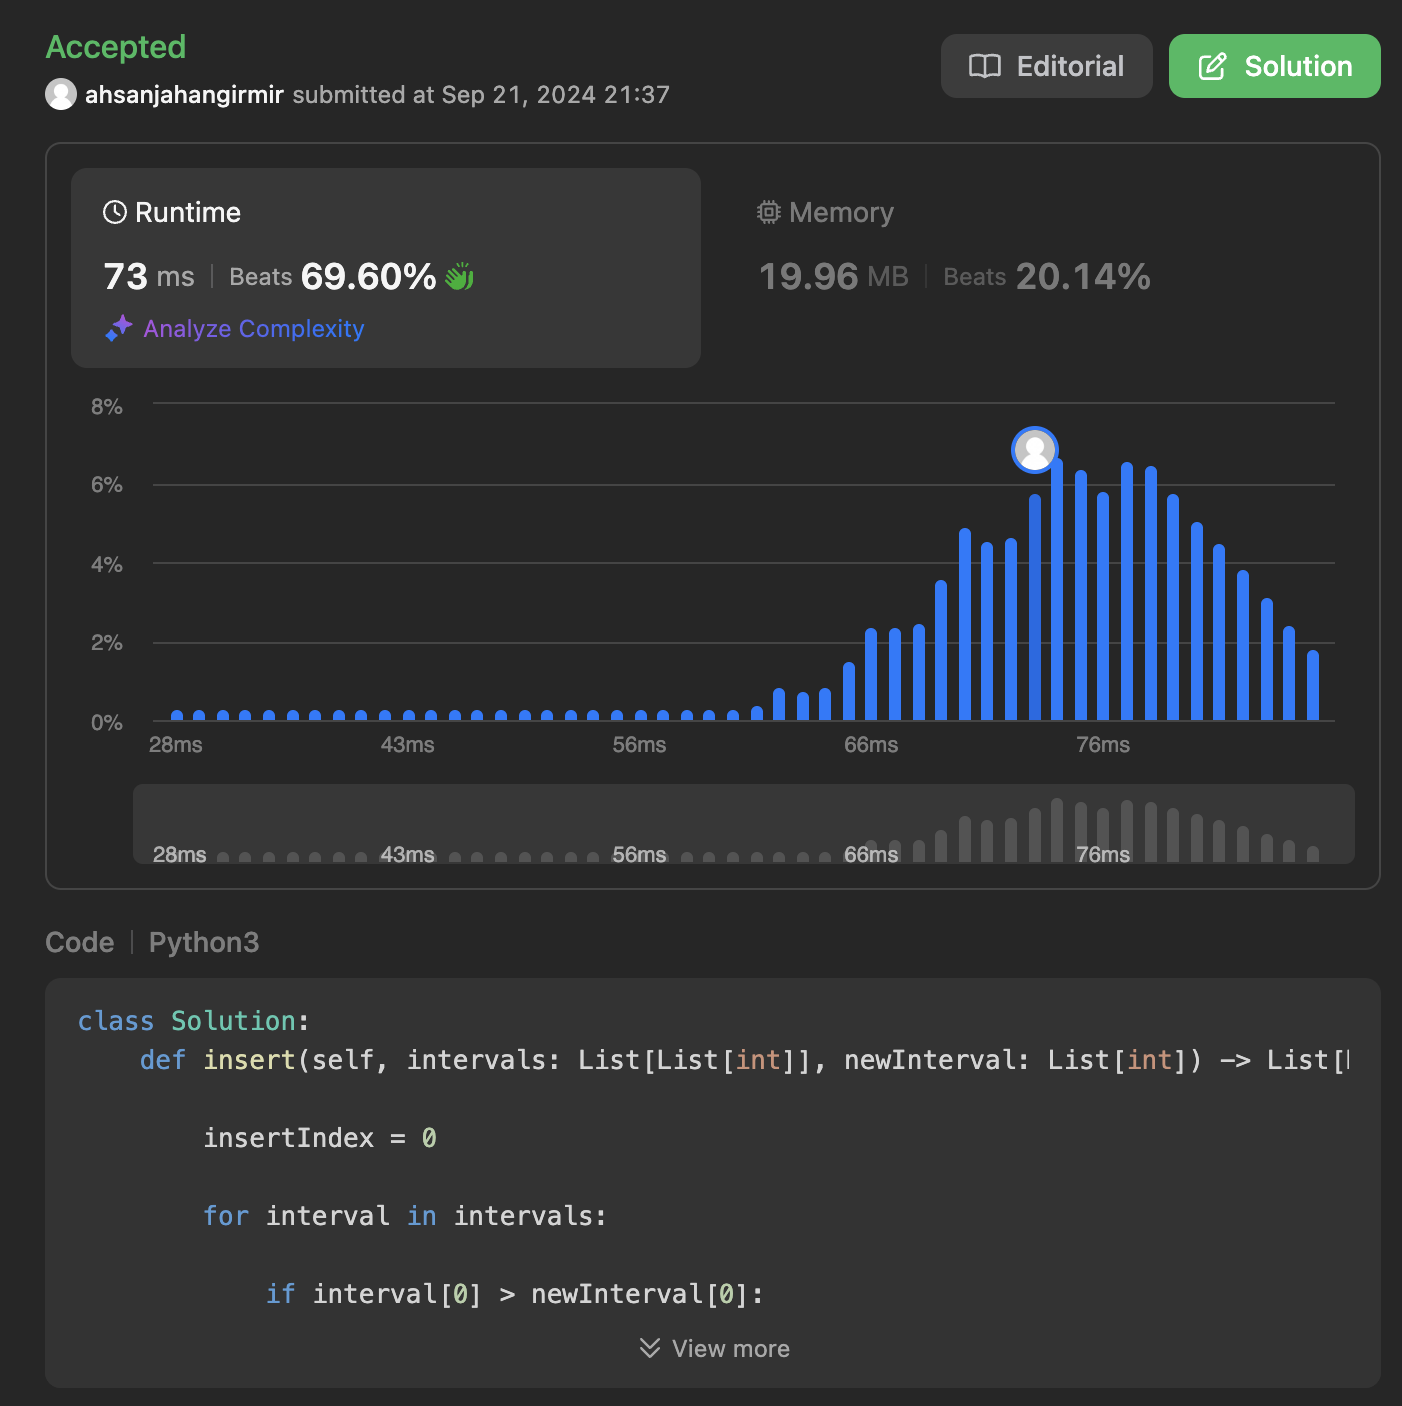

Thought Process / Reflection on challenges faced:

This problem was fairly simple with not many challenges because it relied solely on the implementation of merging overlaps. There was not much else to think about in terms of logic.  

Time Complexity

O(N)

Space Complexity

O(N)

Time Taken

18 minutes

**Problem 2:**
Interval Intersection

In [ ]:
class Solution:
    def intervalIntersection(self, firstList: List[List[int]], secondList: List[List[int]]) -> List[List[int]]:

        intersections = []

        for first in firstList:
            for second in secondList:
                if len(first) > 1 and len(second) > 1 and first[-1] >= second[0]:
                    intersection = [max(second[0], first[0]), min(second[1], first[1])]
                    if intersection[-1] >= intersection[0]:
                        intersections.append(intersection)
       
        return intersections 

Proof of Acceptance / Attempt:

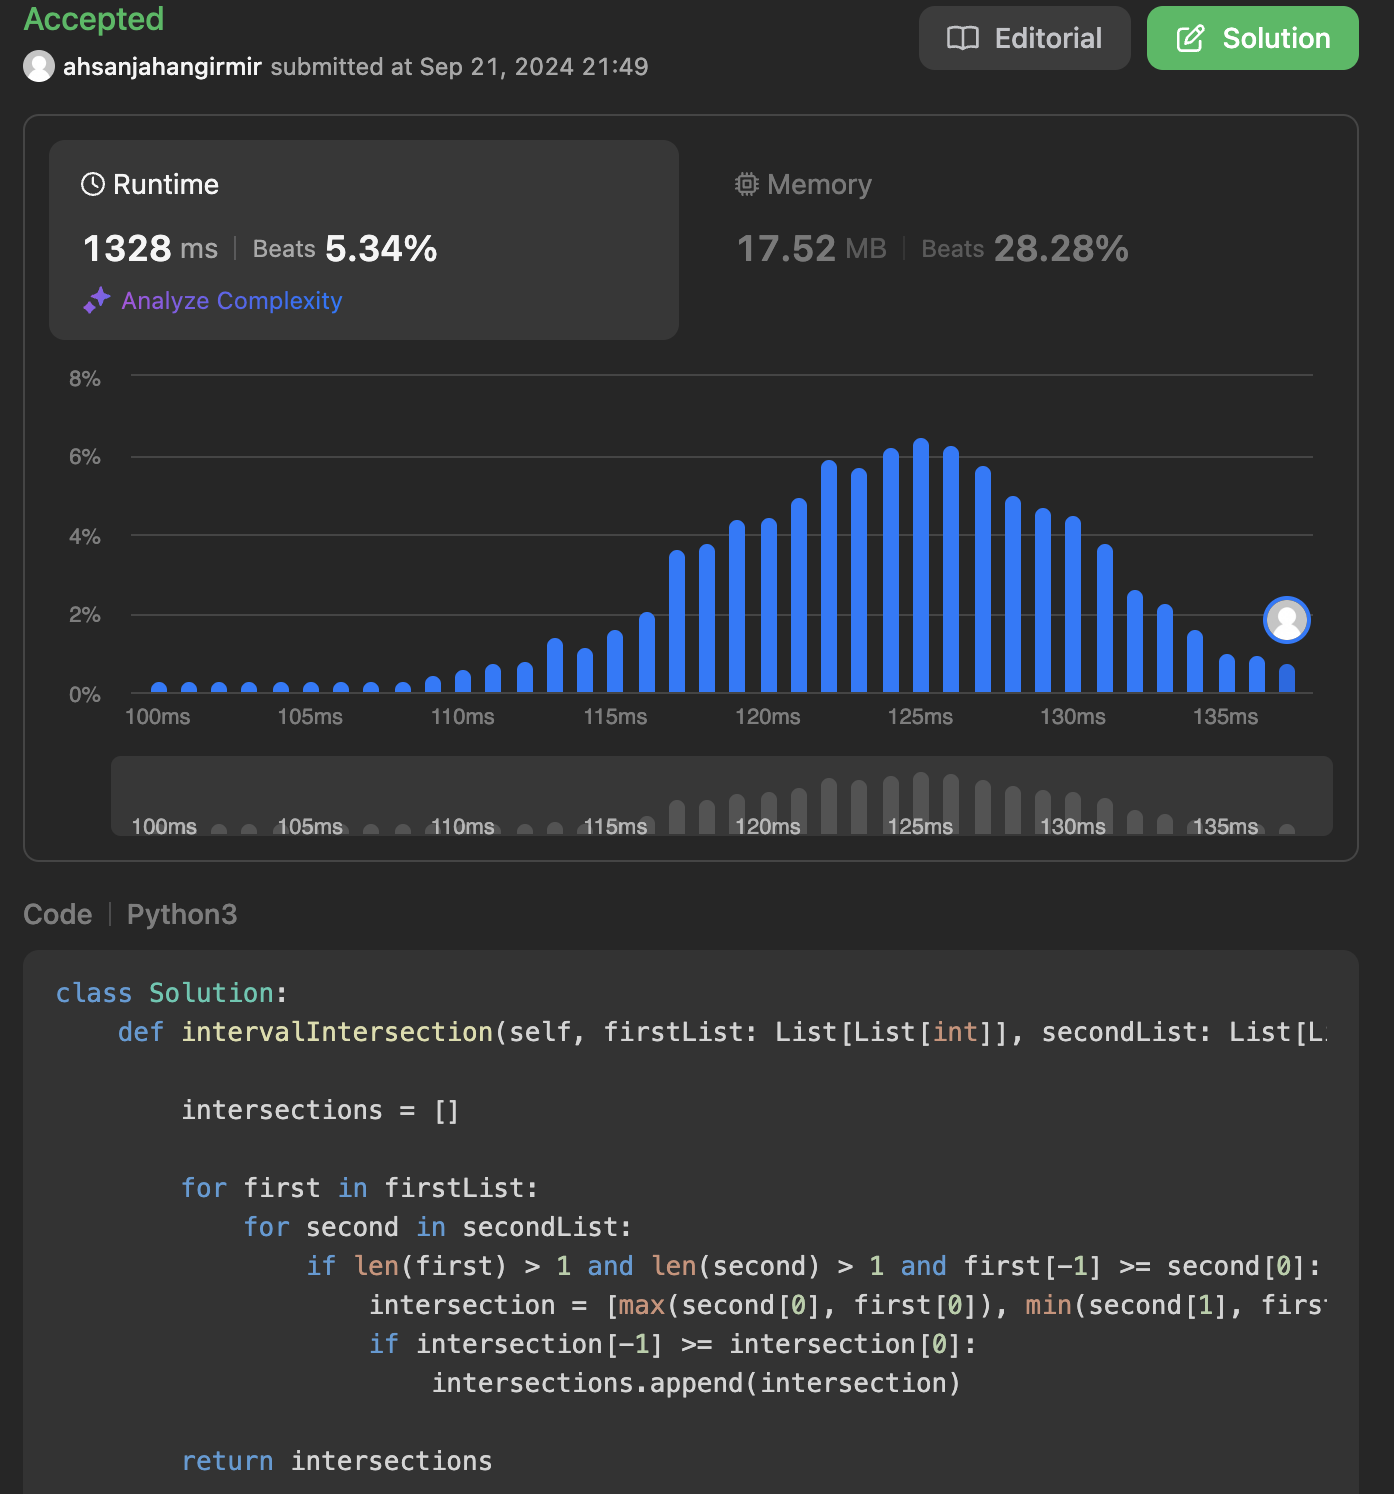

Thought Process / Reflection on challenges faced:

I checked if the end of the current interval from firstList was greater than or equal to the start of the current interval from secondList. If this condition was met, I calculated the intersection by taking the maximum of the start times and the minimum of the end times. I then verified that the end of the intersection was greater than or equal to the start to ensure it was a valid intersection before adding it to the results. 

Reflection: the code did become slow with the use of a nested loop which can be slow for very large inputs but the implementation was accepted so i did not attempt to change this because the code was more intuitive to trace for me this way.

Time Complexity

O(m * n) where m = len(firstList), n = len(secondList)

Space Complexity

O(m + n) where m = len(firstList), n = len(secondList)

Time Taken

19 minutes

**Problem 3:**
Count Days Without Meetings

In [ ]:
class Solution:
    def countDays(self, days: int, meetings: List[List[int]]) -> int:
        
        meetings.sort(key=lambda x: x[0])
        merged = [meetings[0]]  

        for current in meetings[1:]:
            previous = merged[-1]
            if current[0] <= previous[1]:
                merged[-1] = [previous[0], max(previous[1], current[1])]
            else:
                merged.append(current)
        
        # free = [True] * days

        for meeting in merged:
            # free[meeting[0] - 1: meeting[1]] = [False] * (meeting[1] - meeting[0] + 1)
            days -= (meeting[1] - meeting[0] + 1)

        # return sum(free)
        return days
        

Proof of Acceptance / Attempt:

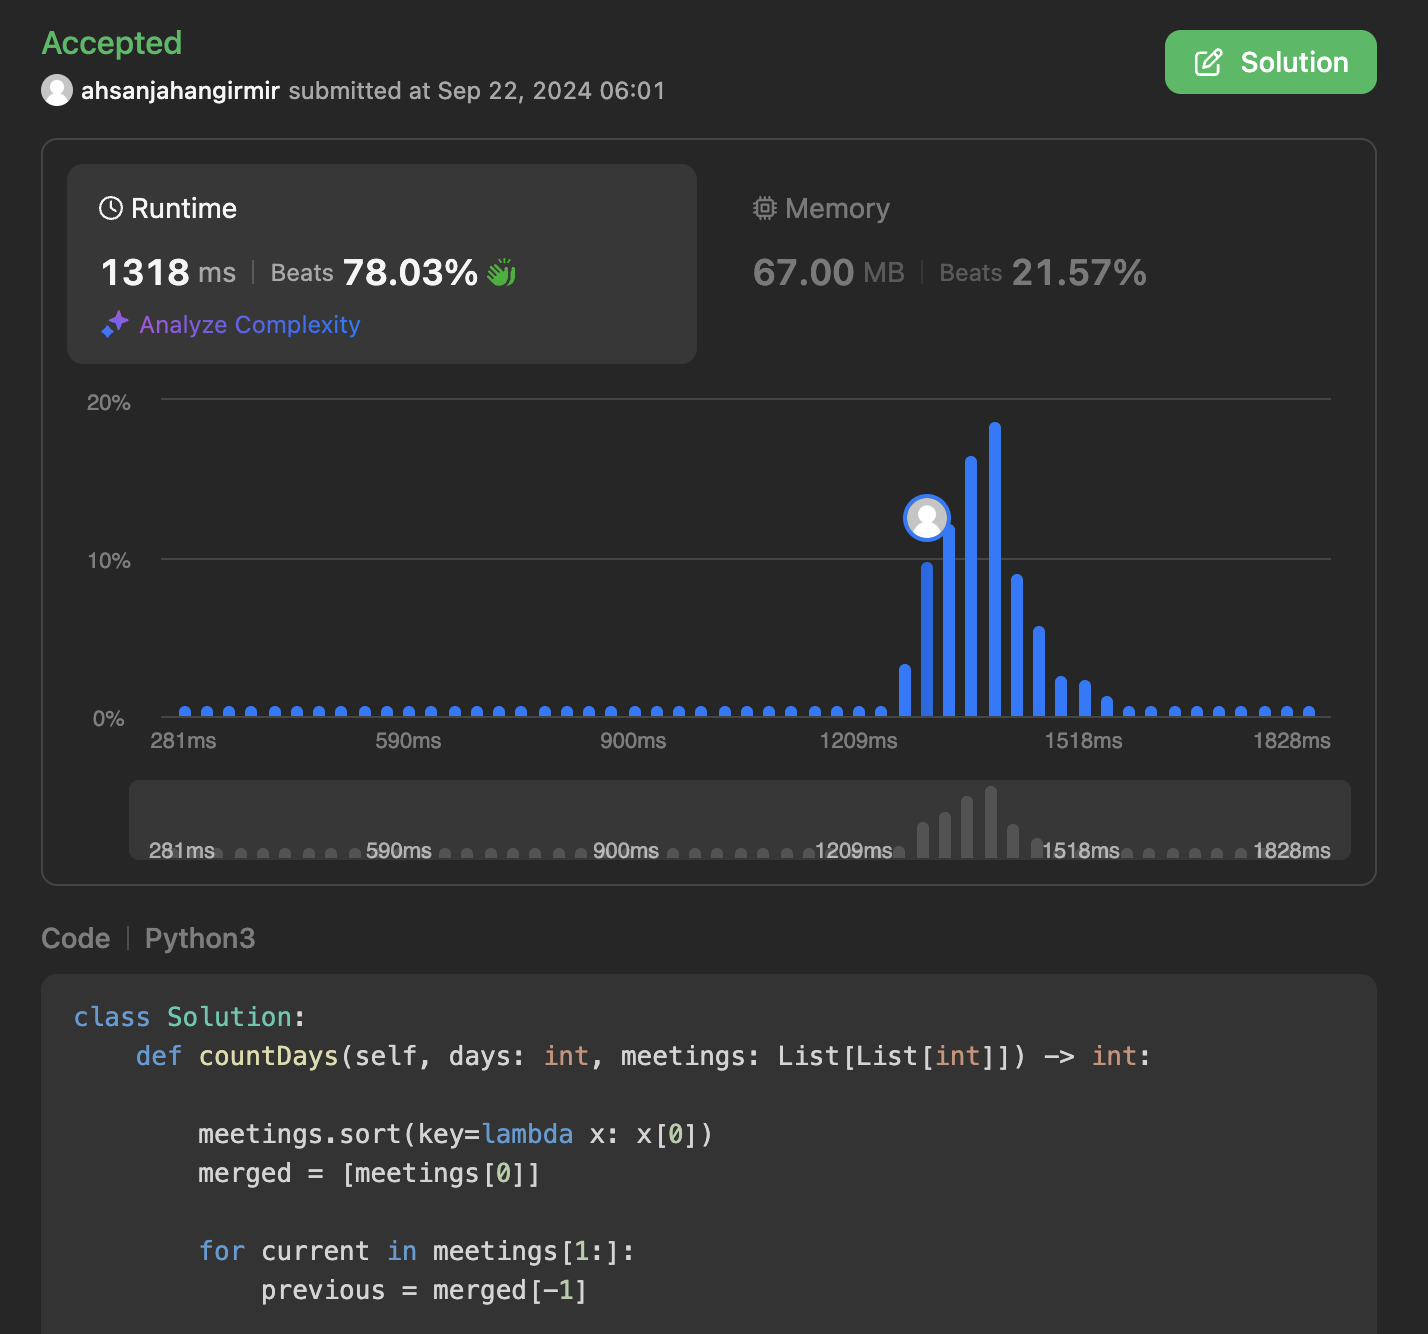

Thought Process / Reflection on challenges faced:

Initially, I wanted to create a method that calculates how many free days remain after scheduling meetings over a given number of days. My first approach was to track free days using a list where each index represented a day. I thought this would be a straightforward way to mark days as unavailable based on meeting schedules. I started by initializing a free list filled with True, indicating all days were free at the start. In the next step, I attempted to iterate through each meeting, marking the corresponding days in the free list as False. This method consumed a lot of memory, especially when the days input was large so i had to shift towards a more efficient solution. I took an approach that involved merging overlapping meetings. I sorted the meetings by their start days and created a merged list to consolidate overlapping or contiguous meetings. This way, I could easily calculate the number of occupied days by simply subtracting the total meeting days from the total available days. In the final loop, instead of trying to mark days directly in the free list, I calculated the number of occupied days by subtracting the range of each meeting from days.


Time Complexity

O(NlogN)

Space Complexity

O(N)

Time Taken

28 minutes

**Problem 4:**
Divide Intervals Into Minimum Number of Groups

In [ ]:
class Solution:
    def minGroups(self, intervals: List[List[int]]) -> int:
        events = []
        for l, r in intervals:
            events.append((l, 1))
            events.append((r + 1, -1))

        events.sort()

        current_overlap = 0
        max_overlap = 0

        for position, delta in events:
            current_overlap += delta
            max_overlap = max(max_overlap, current_overlap)

        return max_overlap

Proof of Acceptance / Attempt:

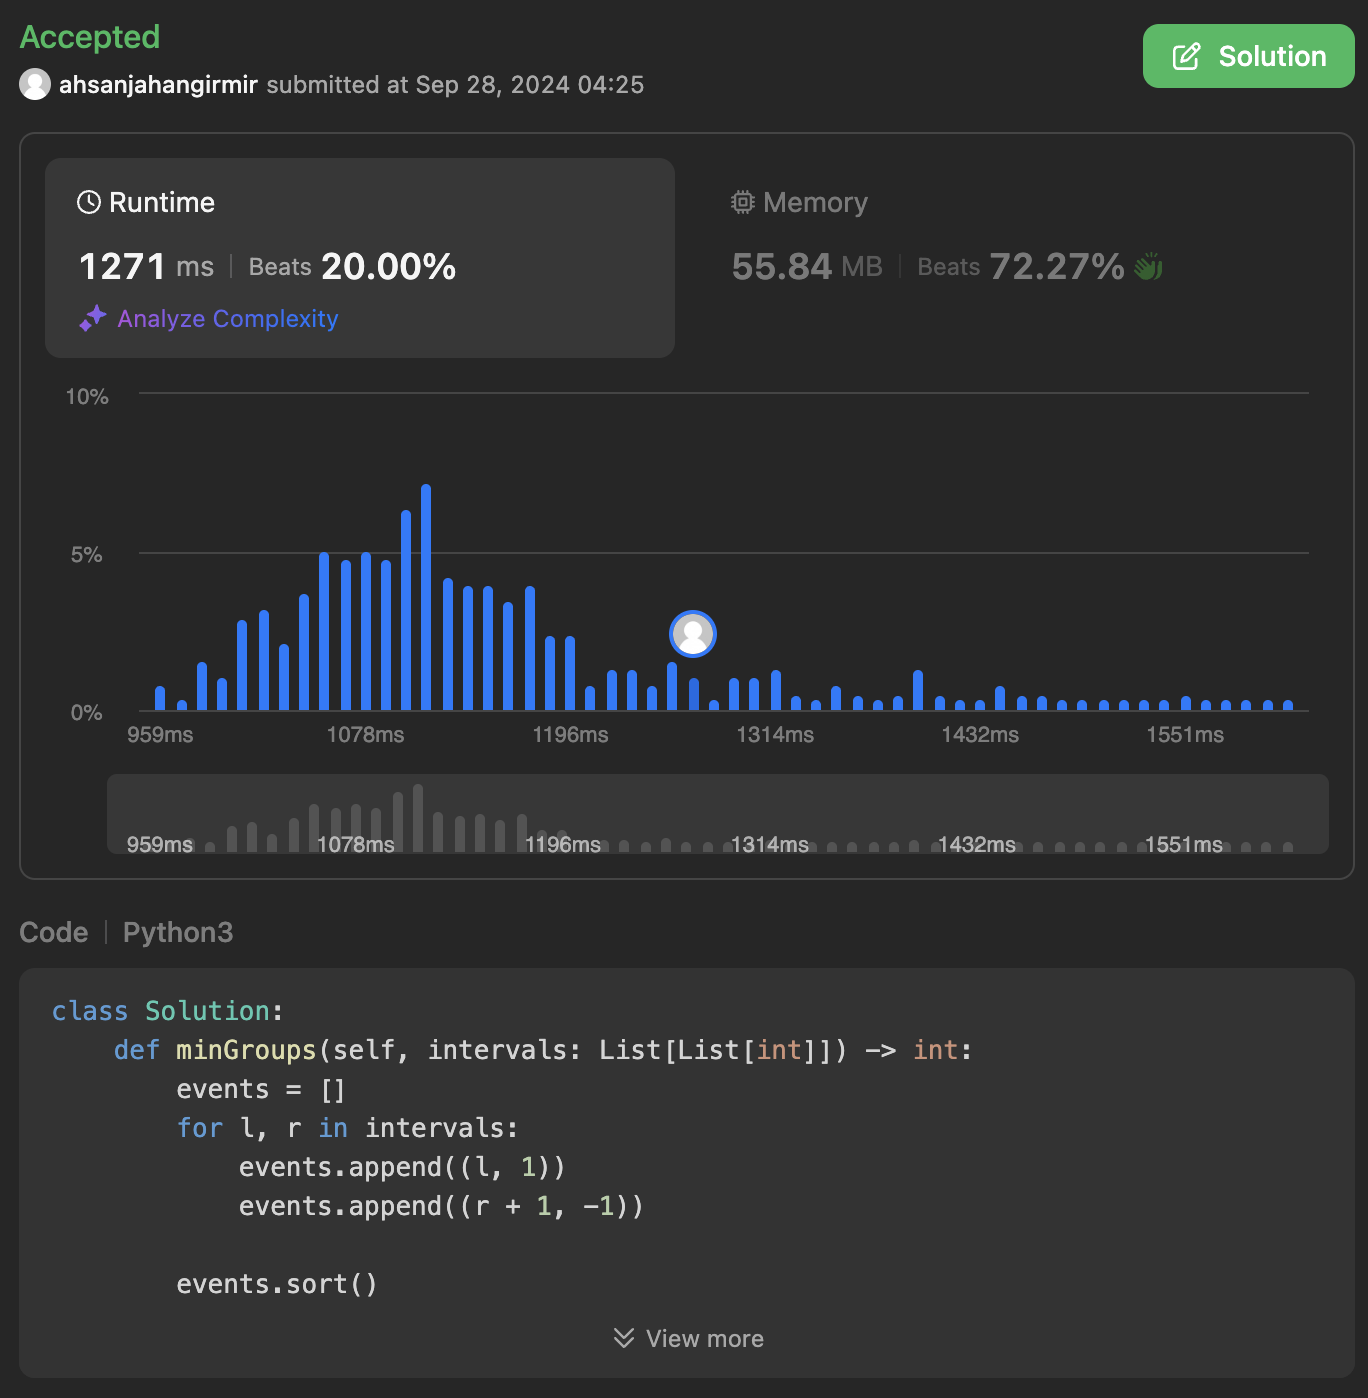

Thought Process / Reflection on challenges faced:

To determine the minimum number of groups required for non-intersecting intervals, I started focusing on sorting them and evaluating their overlap, aiming to find the fewest overlapping sets. I figured this could be possible if we could find the largest overlap. For finding minimum number of groups, I created an event list. For each interval [l, r], I add an event at l with delta +1 and at r+1 with delta -1. Sorting these events and processing them reveals the maximum current overlap, indicating the required groups. 

Challenges: tracking the maximum overlap in the second for loop using current_overlap. I found it difficult how to update max overlap in events but after a while, i was able to trace a tracking variable current_overlap to update the max overlap as i looped through deltas. 

Time Complexity

O (n log n)

Space Complexity

O(N)

Time Taken

48 minutes

**Problem 5:**
Permutation in String

In [ ]:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        
        s1 = sorted(s1)
        windowLen = len(s1)
        i = 0

        while i < len(s2) - windowLen + 1:
            if sorted(s2[i:i+windowLen]) == s1:
                return True
            i += 1

        return False
        

Proof of Acceptance / Attempt:

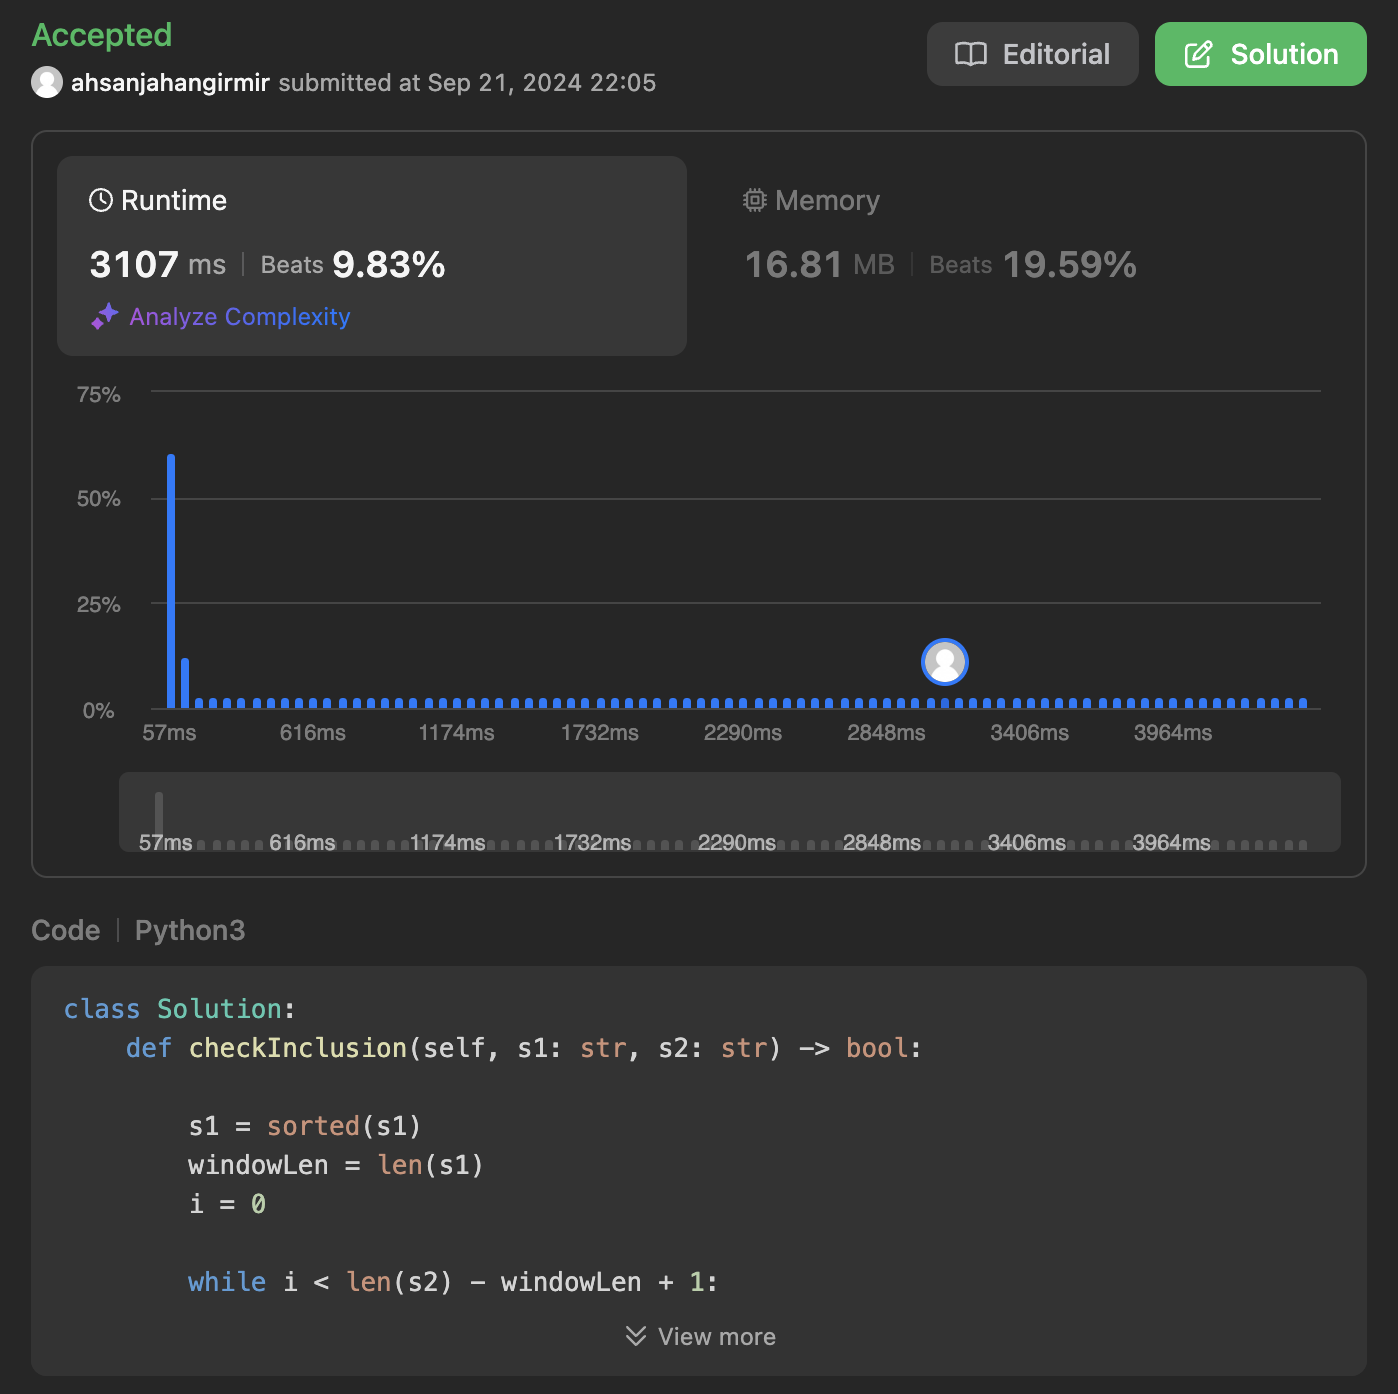

Thought Process / Reflection on challenges faced:

This problem was simple without any major challenges. I sorted s1 first, which allows me to compare it directly with sorted substrings of s2. By using a while loop, I iterated through s2, extracting each substring of length equal to s1 and sorting it to see if it matches s1. If I completed the loop without finding a match, I returned False.

The biggest challenge I faced was ensuring that the comparisons were efficient because sorting each substring within the loop was a costly nlogn operation, especially if s2 is very long but the problem didn't require strict efficiency, this simple solution worked for smaller input sizes, and I opted for clarity over optimization.

Time Complexity

O(n * m log m) -> m = len(s1) and n = len(s2)

Space Complexity

O(m)

Time Taken

24 minutes

**Problem 6:**
Words Concatenation

In [ ]:
import collections

class Solution:
    def findSubstring(self, s: str, words: List[str]) -> List[int]:
        if not s or not words:
            return []
        
        word_length = len(words[0])
        total_length = word_length * len(words)
        words_counter = collections.Counter(words)
        result = []

        for i in range(word_length):
            left = i
            current_counter = collections.Counter()
            words_used = 0

            for j in range(i, len(s) - word_length + 1, word_length):
                word = s[j:j + word_length]
                if word in words_counter:
                    current_counter[word] += 1
                    words_used += 1

                    while current_counter[word] > words_counter[word]:
                        left_word = s[left:left + word_length]
                        current_counter[left_word] -= 1
                        words_used -= 1
                        left += word_length

                    if words_used == len(words):
                        result.append(left)

                        left_word = s[left:left + word_length]
                        current_counter[left_word] -= 1
                        words_used -= 1
                        left += word_length
                else:
                    current_counter.clear()
                    words_used = 0
                    left = j + word_length

        return result


Proof of Acceptance / Attempt:

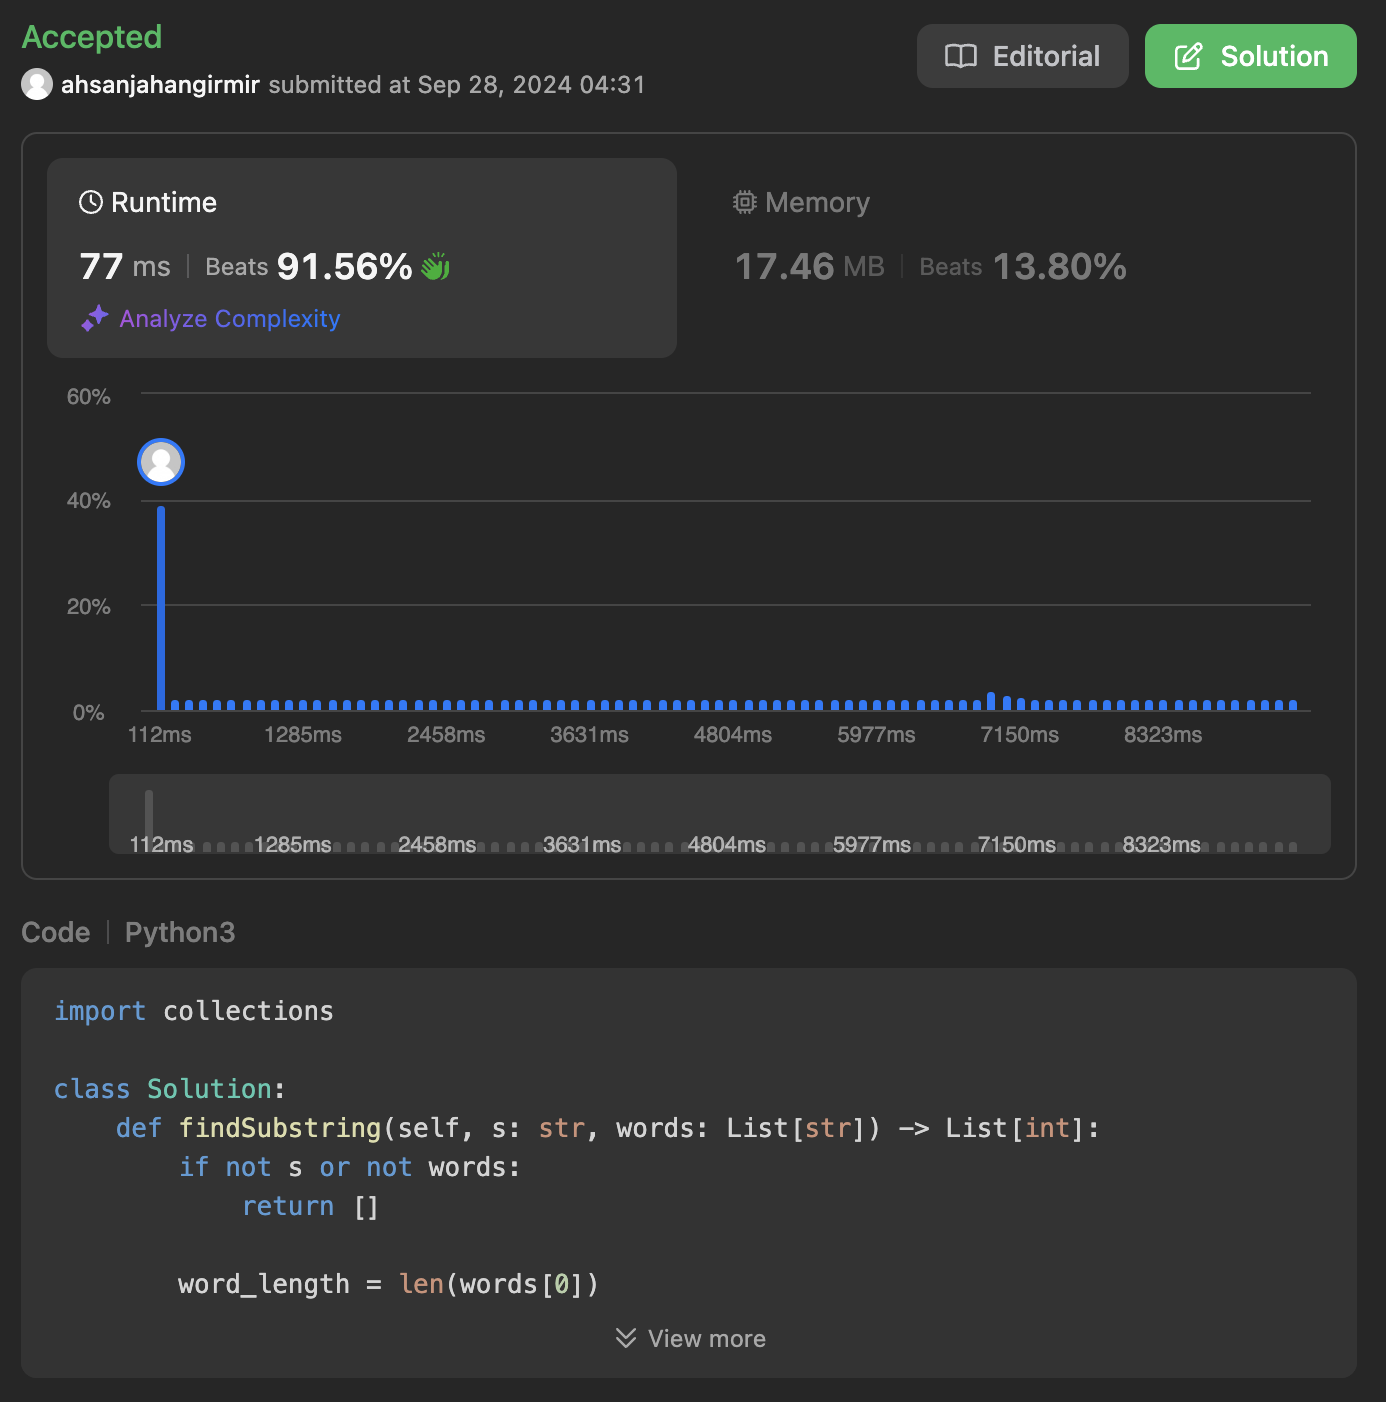

Thought Process / Reflection on challenges faced:

In this problem, we had to find substrings in a string using an array of identical-length words aiming to identify valid concatenated strings. Since the words can appear in any order and may contain duplicates, I need to account for the frequency of each word. The main idea was to partition s into chunks because all words are equal size of word_length. After that, we just slide a window of size total_length = word_length * len(words) across s and check if the substring matches the concatenation of all words while tracking the frequency of words in the current window.

Challenges: It took long to pass all test cases because of little nuances that arose in the implementation but it took me a while ot get clarity on handling duplicate words in the concatenation problem because each word in the concatenated string must appear its exact number of times as in the original list. Another challenge i faced was setting the right condiiton in the second for loop to use a word_length sized step while looping through the strings.

Time Complexity

O(n * m) ->  n = len(s) and m is the number of words.

Space Complexity

O(m)

Time Taken

59 Minutes

**Problem 7:**
Smallest Window Containing Substring

In [ ]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:

        if not t or not s:
            return ""

        need = {} # dict to keep a count of all the unique characters in t.
        for char in t:
            need[char] = need.get(char, 0) + 1

        required = len(need)
        left, right = 0, 0
        formed = 0
        window_counts = {}
        ans = (float('inf'), None, None)

        while right < len(s):
            character = s[right]
            window_counts[character] = window_counts.get(character, 0) + 1

            if character in need and window_counts[character] == need[character]:
                formed += 1

            while left <= right and formed == required:
                character = s[left]

                if right - left + 1 < ans[0]:
                    ans = (right - left + 1, left, right)

                window_counts[character] -= 1
                if character in need and window_counts[character] < need[character]:
                    formed -= 1

                left += 1  
            right += 1  

        return "" if ans[0] == float('inf') else s[ans[1]: ans[2]+1]


Proof of Acceptance / Attempt:

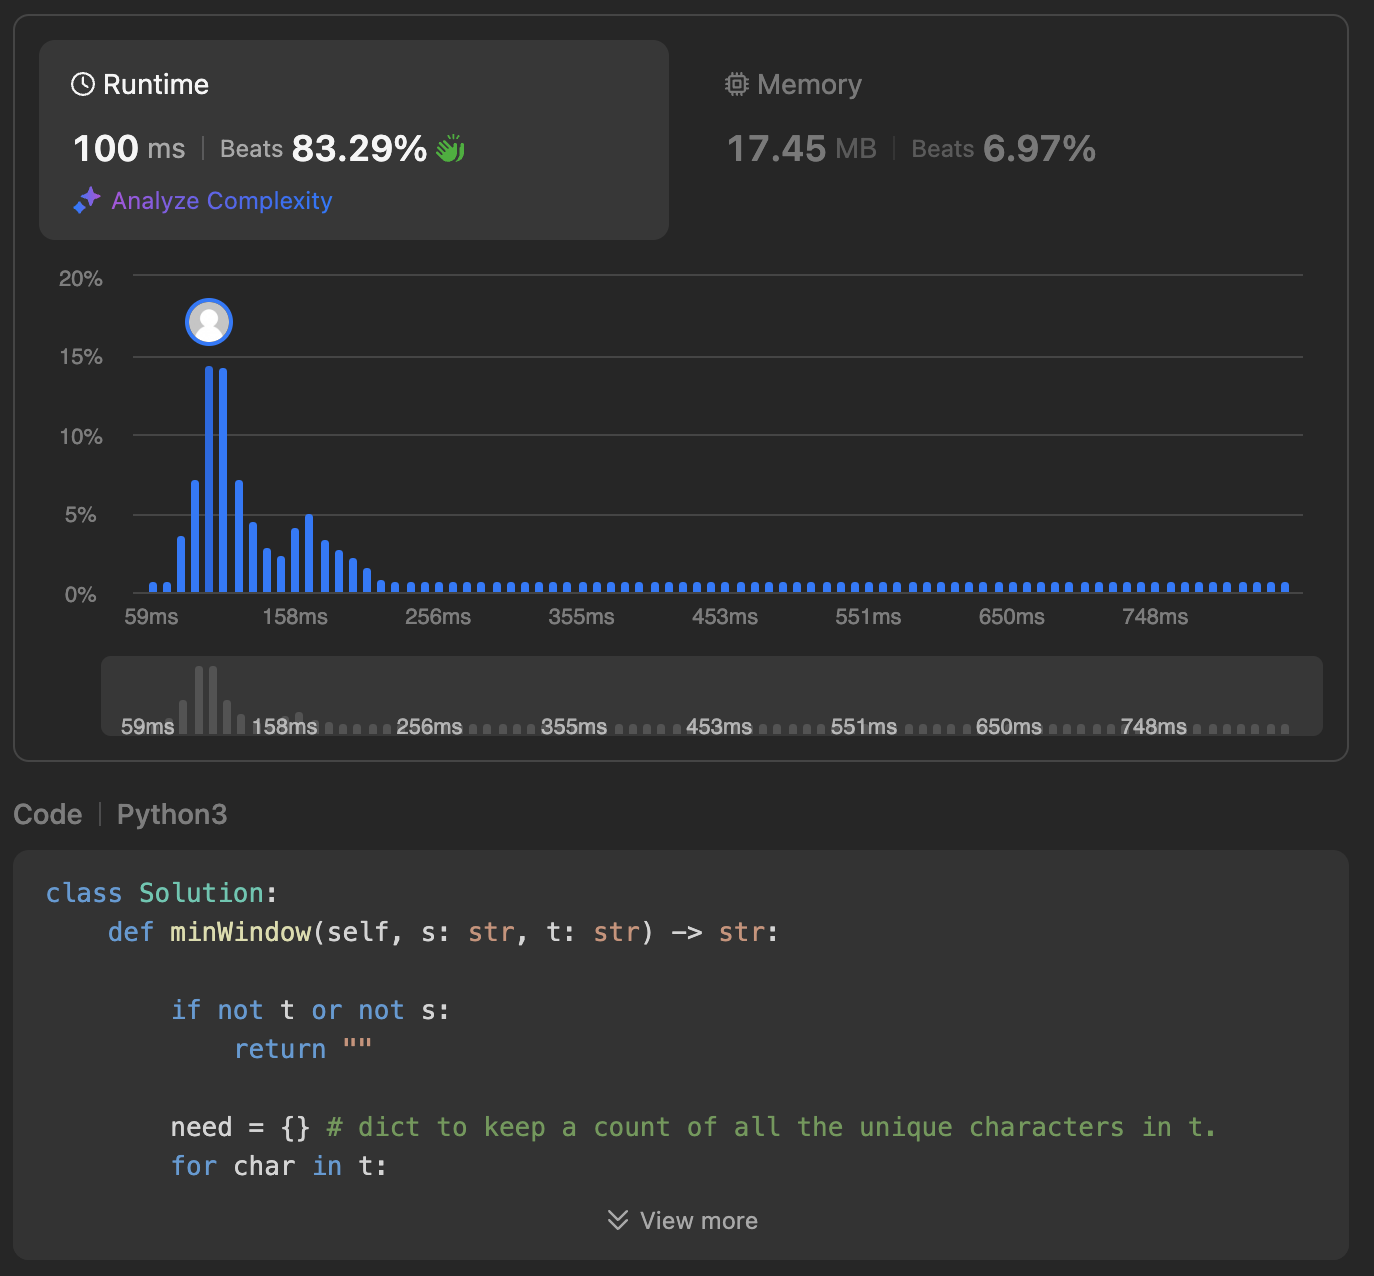
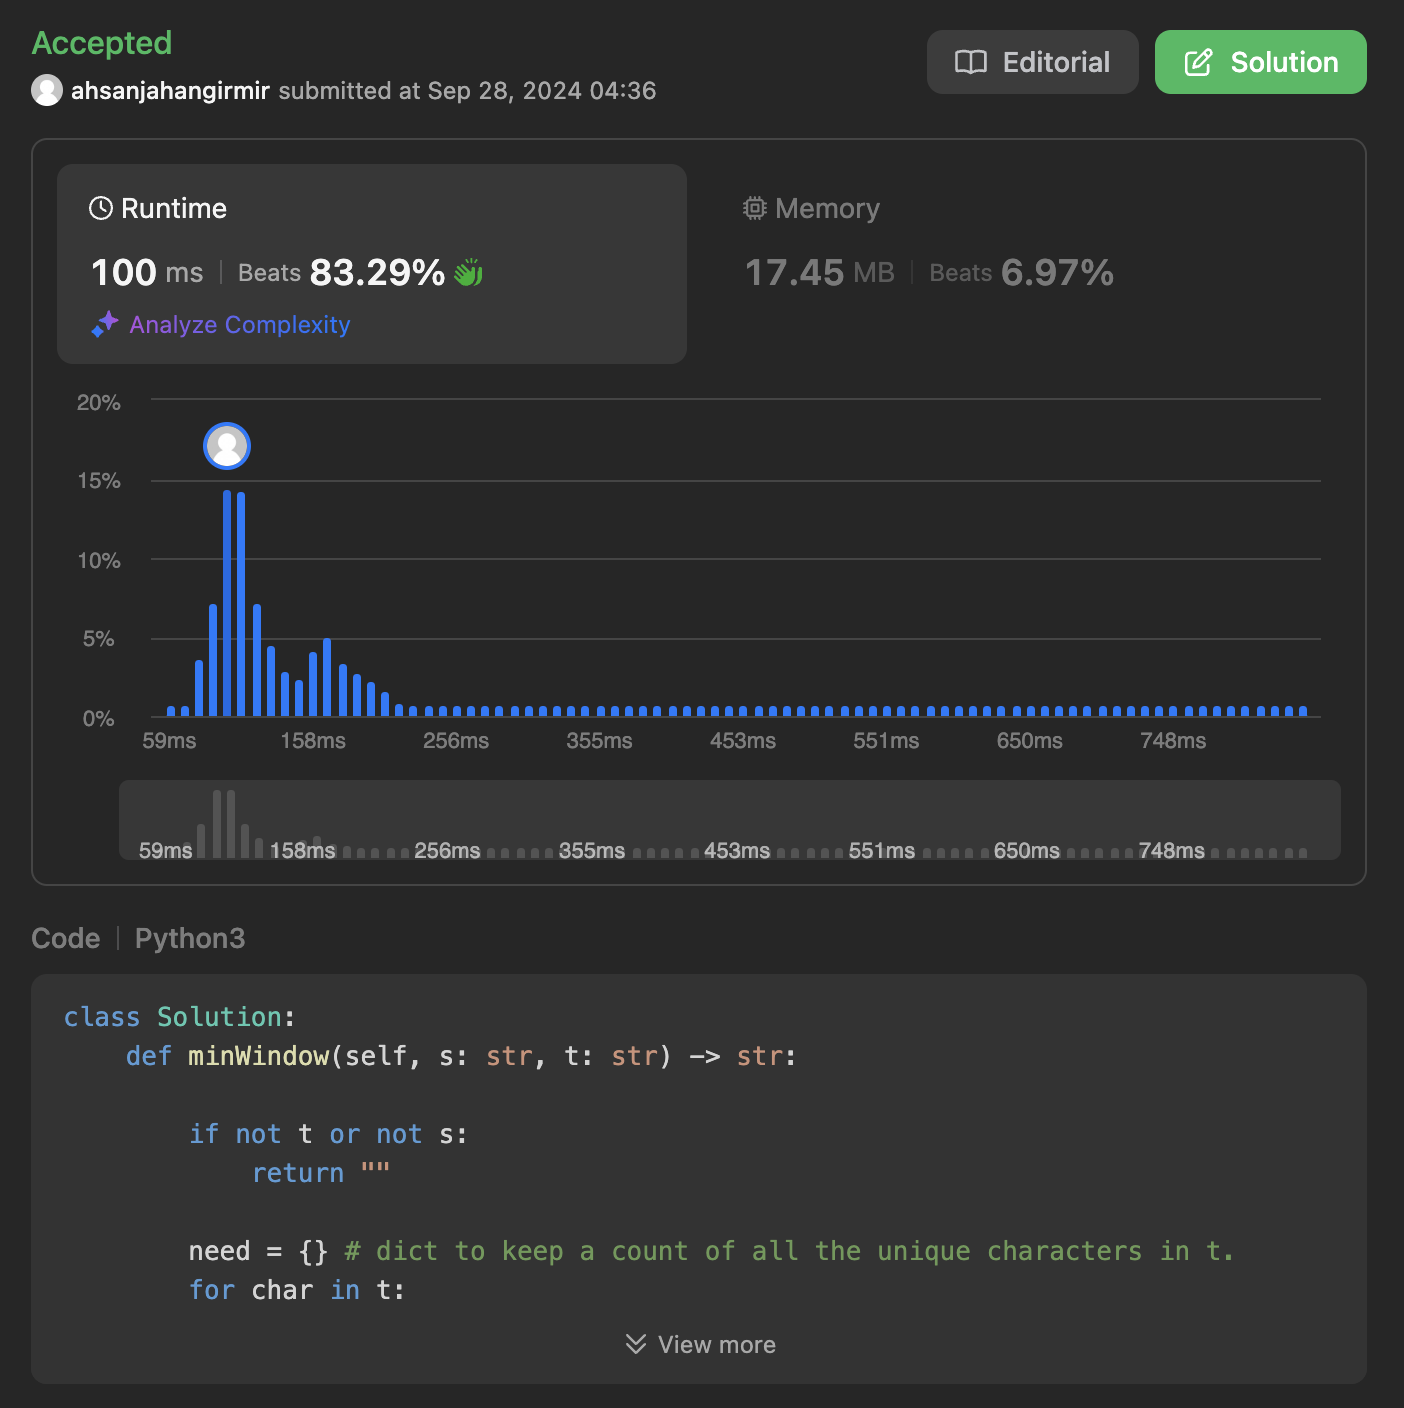

Thought Process / Reflection on challenges faced:

I first check for the edge case if either s or t is empty because in that case no window can be found. Then, I create a dictionary need to store the frequency of each character in t. "required" tracks total number of unique characters in t that need to be present in a window. then i initialize pointers left and right to 0 to represent the window i will slide through s. "formed" tracks of how many unique characters from t meet the required frequency in the current window. window_counts keeps the count of characters in the current window. "ans" stores the length and indices of the minimum window found. with these tracking variables, I expand the right end of the window by moving right and include the character at s[right] into window_counts. if the frequency of the current character matches its required frequency in t, I increment "formed".
When formed equals required, it means all characters in t are present in the current window with the desired frequency. after this, i try to shrink the window from the left by moving left forward. Before moving left, I check if the current window is smaller than the previously recorded minimum window and update ans if it is. I decrease the count of s[left] in window_counts and update formed if necessary. I continue this process until the window ceases to be desirable (i.e., formed is less than required). After the loop, if ans[0] is still float('inf'), it means no valid window was found, and I return an empty string otherwise we get the substring from ans[1] to ans[2] inclusive.

Challenge: this was the most time consuming problem of the set because most of the parts of the problem were very counter intuitive. there was a lot of cases to think about outside merely setting up a sliding window which is why i had to revisit the traced out solutions and code multiple times.

Time Complexity

O(n) -> n = len(s)

Space Complexity

 O(m) -> m = num of unique chars in t

Time Taken

2 hours 12 minutes

**Problem 8:**
Longest Substring with Same Letters After Replacement

In [ ]:
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:

        start = 0
        end = 0
        hashtable = {}
        longest = -1

        for end in range(len(s)):

            if s[end] in hashtable.keys():
                hashtable[s[end]] += 1
            else:
                hashtable[s[end]] = 1
            
            # while the number of chars to replace are more than we can replace, shorten the window 
            while sum(list(hashtable.values())) - max(list(hashtable.values())) > k:
                hashtable[s[start]] -= 1
                start += 1
            
            longest = max(longest, end - start + 1)

        return longest

        

Proof of Acceptance / Attempt:

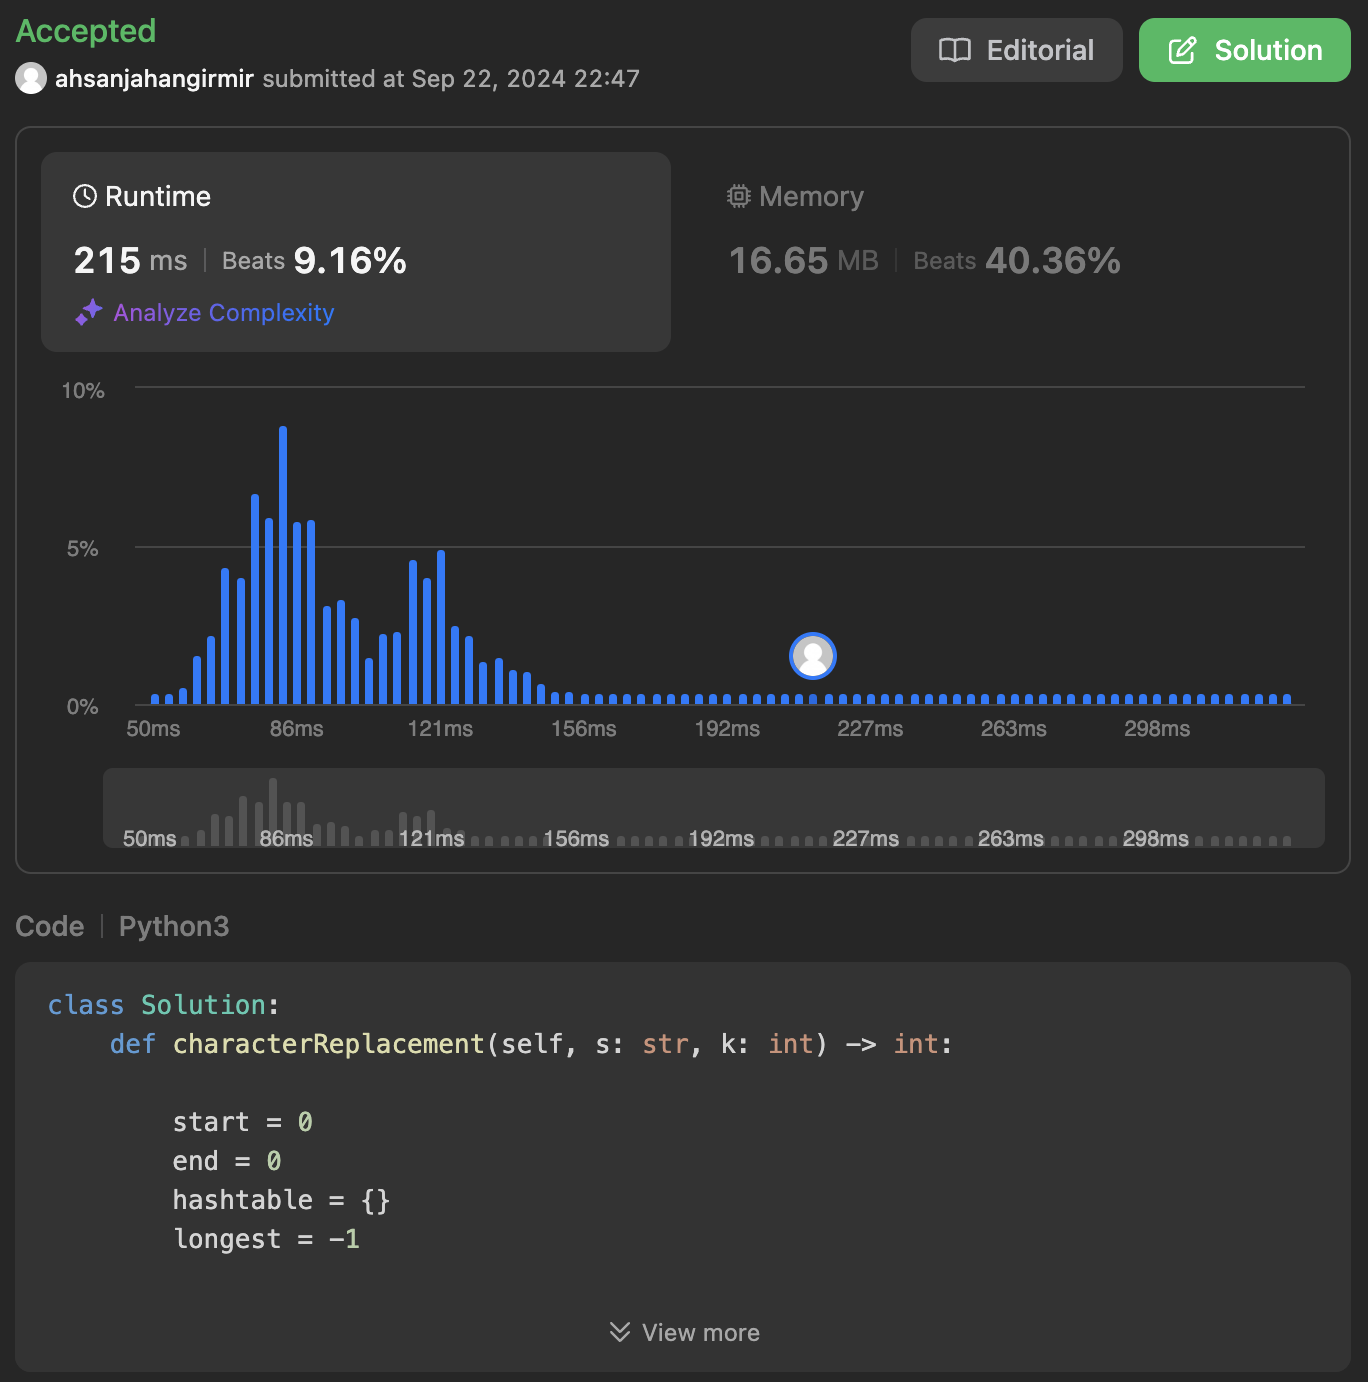

Thought Process / Reflection on challenges faced:

The core logic of the algorithm involved ensuring that the number of characters to replace does not exceed k. To do this i need to start by checking the total number of characters in the window (given by the sum of the values in the hashtable) and subtracting the count of the most frequently occurring character (obtained using max(list(hashtable.values()))). If this difference exceeds k, it means we need to shrink the window from the left. Therefore, I decremented the count of the character at the start index and moved the start pointer to the right until the window became valid again. Finally, I updated the longest variable with the maximum length found by comparing it to the current window size (end - start + 1).This was an easy problem to solve intuitively. I just need to slide a window through the string and track frequencies of characters using a hashmap within that window. The main thinking went into figuring out the condition for the while loop which shrank the window. 

Time Complexity

O(N)

Space Complexity

O(1)

Time Taken

21 minutes

**Problem 9:**
Fruits into Baskets

In [ ]:
class Solution:
    def totalFruit(self, fruits: List[int]) -> int:
        
        if len(fruits) <= 2:
            return len(fruits)

        maxBasket = 0
        start = 0
        basket = {}

        for end in range(len(fruits)):

            if fruits[end] in basket:
                basket[fruits[end]] += 1
            else:
                basket[fruits[end]] = 1

            while len(basket) > 2:
                basket[fruits[start]] -= 1
                if basket[fruits[start]] == 0:
                    del basket[fruits[start]]
                start += 1

            maxBasket = max(maxBasket, end - start + 1)

        return maxBasket

Proof of Acceptance / Attempt:

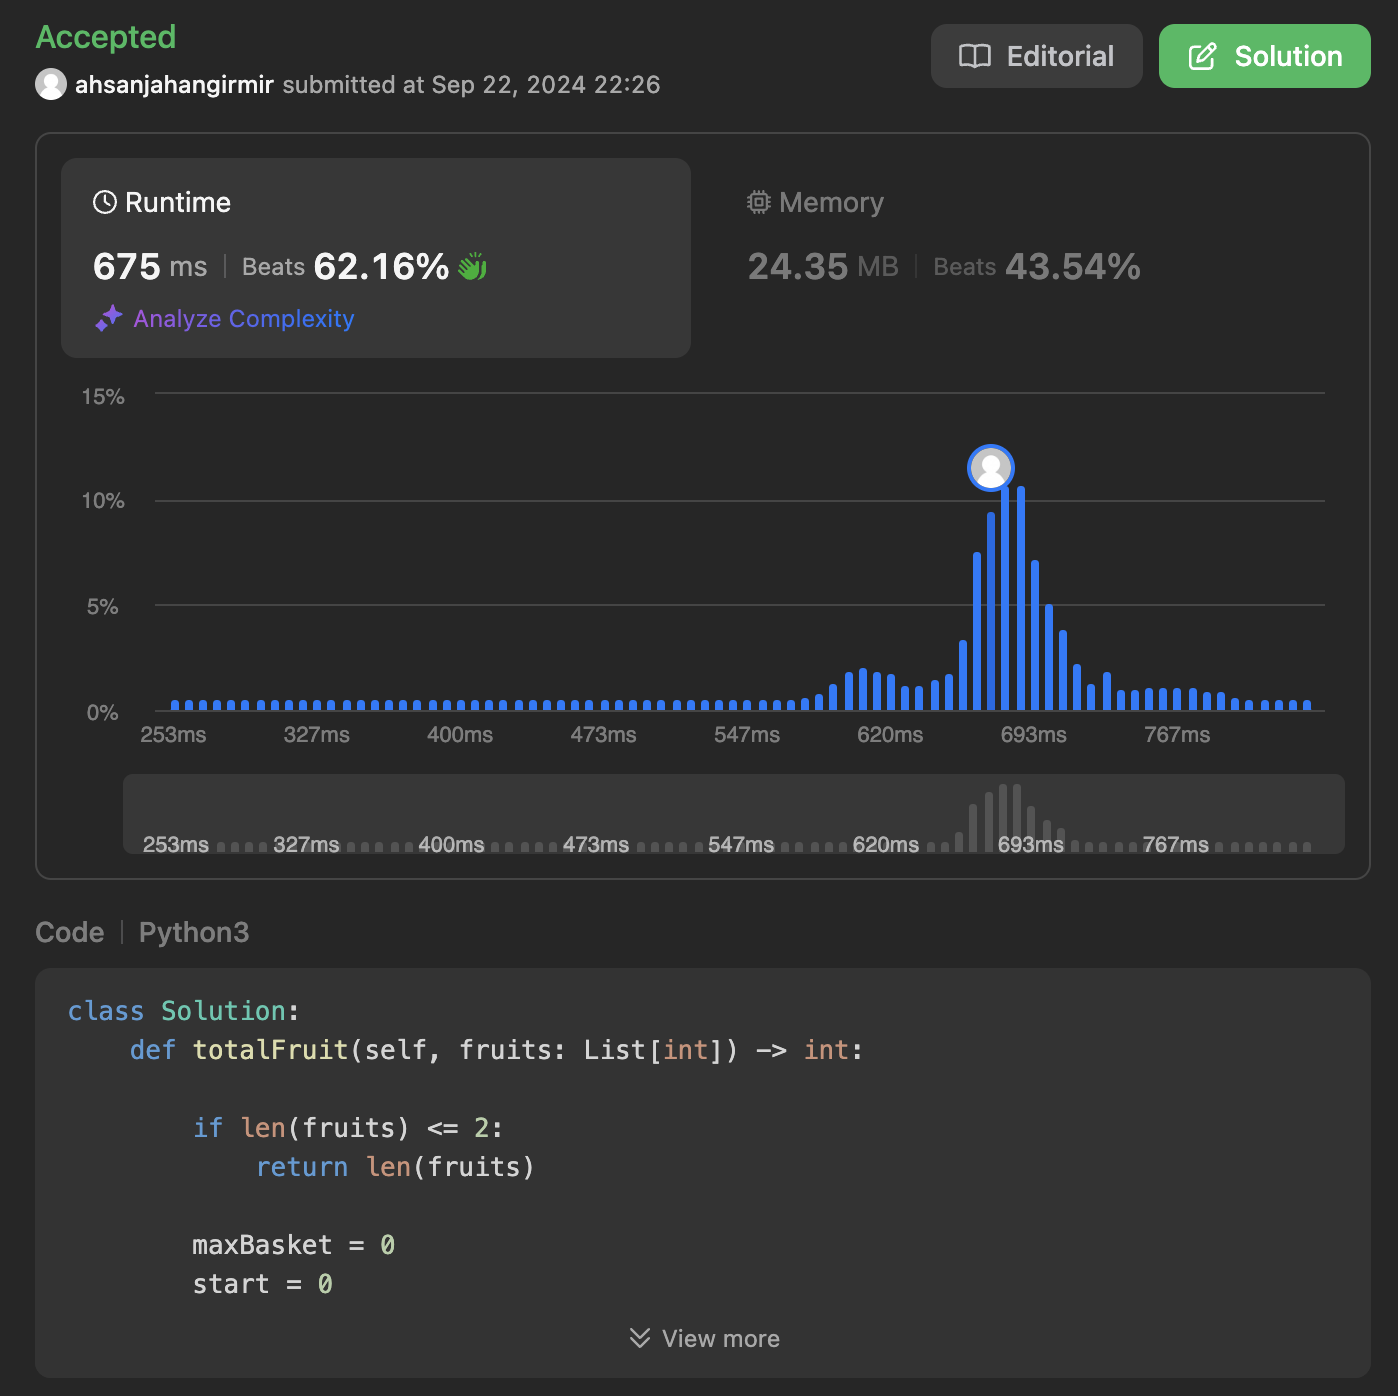

Thought Process / Reflection on challenges faced:

There was not much issue in mapping out the implementation to solve this problem. First, I handled the edge case where the list of fruits had two or fewer items. In such cases, the maximum number of fruits that can be collected is simply the length of the list. Next, as I looped through each fruit with a end pointer, I updated the basket dict to keep track of the count of each fruit type within the current window defined by the start and end pointers. If I encountered a new fruit type, I added it to the dictionary. The challenge arose when I needed to ensure that the basket contained at most two types of fruits. It was easy to solve this because i just needed to manipulate the window and basket: if the basket exceeded this limit, I adjusted the start pointer to shrink the window from the left. I decremented the count of the fruit at the start index and removed it from the dictionary if its count dropped to zero. 

Time Complexity

O(N)

Space Complexity

O(1)

Time Taken

24 minutes